In [1]:
import sklearn.model_selection as sk
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.datasets import make_friedman1
import tensorflow as tf
import numpy as np
from mat4py import loadmat
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 

In [12]:
#X,Y=make_blobs(n_samples=5000, n_features=2, centers=3, cluster_std=1.0)
input_plot_data = np.loadtxt('input_plot_data.txt')
output_plot_data  = np.loadtxt('output_plot_data.txt')  

input_plot_data=np.array(input_plot_data)
output_plot_data=np.array(output_plot_data)

input_plot_data = tf.cast(input_plot_data,tf.float32)
output_plot_data = tf.cast(output_plot_data,tf.float32)

np.savetxt("input_plot_data.data", input_plot_data)
np.savetxt("output_plot_data", output_plot_data)

In [2]:
input_train_total = np.loadtxt('input_train_total.txt')
input_train_inside = np.loadtxt('input_train_inside.txt')

output_train_total  = np.loadtxt('output_train_total.txt')
output_train_inside  = np.loadtxt('output_train_inside.txt')

In [3]:
input_train_boundary = np.loadtxt('input_train_boundary.txt')
input_train_inside = np.loadtxt('input_train_inside.txt')

input_test = np.loadtxt('input_test.txt')


output_train_boundary  = np.loadtxt('output_train_boundary.txt')
output_train_inside  = np.loadtxt('output_train_inside.txt')
output_test  = np.loadtxt('output_test.txt')       

In [4]:
gauss_solution = np.loadtxt('gauss_solution.txt')

In [5]:
gauss_solution=np.array(gauss_solution)

In [6]:
gauss_solution = tf.cast(gauss_solution,tf.float32)

In [7]:
np.savetxt("gauss_solution.data", gauss_solution)

In [4]:
x_train_total=np.array(input_train_total)
x_train_inside=np.array(input_train_inside)

#x_test=np.array(input_test)


y_train_total=np.array(output_train_total)
y_train_inside=np.array(output_train_inside)


#y_test=np.array(output_test)

In [5]:
for i in range(len(y_train_inside)):

    y_train_inside[i]=y_train_inside[i]+0.01*np.random.normal()*np.std(y_train_inside)

In [14]:
input_train_boundary = np.loadtxt('input_train_boundary.txt')


output_train_boundary  = np.loadtxt('output_train_boundary.txt')


data_train_boundary=np.array(input_train_boundary)

labels_train_boundary=np.array(output_train_boundary)

In [7]:


x_train_total= np.concatenate((x_train_boundary, x_train_inside), axis=0)
y_train_total= np.concatenate((y_train_boundary, y_train_inside), axis=0)

In [8]:
X_train_total=np.array(x_train_total)
X_train_inside=np.array(x_train_inside)

Y_train_total=np.array(y_train_total)
Y_train_inside=np.array(y_train_inside)


#X_test=np.array(x_test)
#Y_test=np.array(y_test)

In [10]:
data_train_total = tf.cast(X_train_total,tf.float32)
data_train_inside = tf.cast(X_train_inside,tf.float32)

In [11]:
labels_train_total = tf.cast(Y_train_total, tf.float32)
labels_train_inside = tf.cast(Y_train_inside, tf.float32)

In [12]:
data_test = tf.cast(X_test, tf.float32)
labels_test = tf.cast(Y_test, tf.float32)

NameError: name 'X_test' is not defined

In [12]:
np.savetxt("data_train_total.data", data_train_total)
np.savetxt("data_train_inside.data", data_train_inside)



#np.savetxt("data_test.data", data_test)
#np.savetxt("labels_test.data", labels_test)


np.savetxt("labels_train_total.data", labels_train_total)
np.savetxt("labels_train_inside.data", labels_train_inside)

<tf.Tensor: id=75, shape=(5000, 2), dtype=float32, numpy=
array([[0.54409796, 0.4603691 ],
       [0.43170756, 0.44603416],
       [0.49898604, 0.44158438],
       ...,
       [0.        , 0.91603184],
       [0.        , 0.81252414],
       [0.7555444 , 0.        ]], dtype=float32)>

In [16]:
x_train=tf.concat([data_train_inside,data_train_boundary],0)
y_train=tf.concat([labels_train_inside,labels_train_boundary],0)




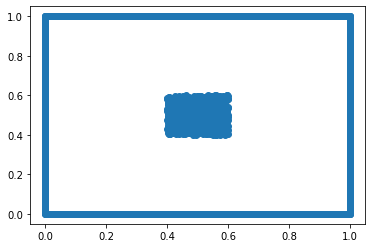

In [26]:
    x = x_train[:,0]
    y = x_train[:,1]
    plt.scatter(x, y)

In [19]:
from scipy.ndimage.filters import gaussian_filter

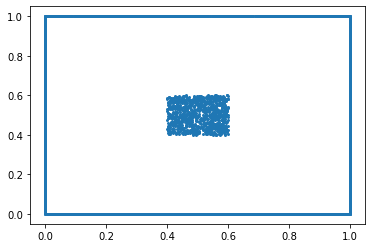

In [27]:
pyplot.scatter(x,y,marker='.',linewidth=0)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(100, activation='elu', input_shape=(2,)))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(x_train,y_train,batch_size=500,epochs=1000,verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

5000/5000 [==============================] - 0s 30us/sample - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 59/1000
5000/5000 [==============================] - 0s 21us/sample - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 60/1000
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 61/1000
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 62/1000
5000/5000 [==============================] - 0s 20us/sample - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 63/1000
5000/5000 [==============================] - 0s 54us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 64/1000
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 65/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 66/1000
5000/5000 [==============================] - 0s 25us/sam

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 128/1000
5000/5000 [==============================] - 0s 32us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 129/1000
5000/5000 [==============================] - 0s 27us/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 130/1000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 131/1000
5000/5000 [==============================] - 0s 32us/sample - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 132/1000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 133/1000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 134/1000
5000/5000 [==============================] - 0s 26us/sample - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 135/1000
5000/5000 [==============================] - 0s 

5000/5000 [==============================] - 0s 42us/sample - loss: 7.1419e-04 - mean_squared_error: 7.1419e-04
Epoch 194/1000
5000/5000 [==============================] - 0s 39us/sample - loss: 6.8804e-04 - mean_squared_error: 6.8804e-04
Epoch 195/1000
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 196/1000
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 197/1000
5000/5000 [==============================] - 0s 49us/sample - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 198/1000
5000/5000 [==============================] - 0s 46us/sample - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 199/1000
5000/5000 [==============================] - 0s 41us/sample - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 200/1000
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 201/1000
5000/5000 [=====================

5000/5000 [==============================] - 0s 51us/sample - loss: 4.2912e-04 - mean_squared_error: 4.2912e-04
Epoch 261/1000
5000/5000 [==============================] - 0s 54us/sample - loss: 3.7833e-04 - mean_squared_error: 3.7833e-04
Epoch 262/1000
5000/5000 [==============================] - 0s 44us/sample - loss: 5.4838e-04 - mean_squared_error: 5.4838e-04
Epoch 263/1000
5000/5000 [==============================] - 0s 54us/sample - loss: 3.5956e-04 - mean_squared_error: 3.5956e-04
Epoch 264/1000
5000/5000 [==============================] - 0s 64us/sample - loss: 3.1432e-04 - mean_squared_error: 3.1432e-04
Epoch 265/1000
5000/5000 [==============================] - 0s 65us/sample - loss: 3.4502e-04 - mean_squared_error: 3.4502e-04
Epoch 266/1000
5000/5000 [==============================] - 0s 80us/sample - loss: 5.1421e-04 - mean_squared_error: 5.1421e-04
Epoch 267/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 5.2795e-04 - mean_squared_error: 5.2795e-04

Epoch 327/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 328/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 329/1000
5000/5000 [==============================] - 0s 35us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 330/1000
5000/5000 [==============================] - 0s 37us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 331/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0012 - mean_squared_error: 0.0012 
Epoch 332/1000
5000/5000 [==============================] - 0s 48us/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 333/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 334/1000
5000/5000 [==============================] - 0s 42us/sample - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 335/1000
5000/5000 [=====================

5000/5000 [==============================] - 0s 31us/sample - loss: 3.8397e-04 - mean_squared_error: 3.8397e-04
Epoch 395/1000
5000/5000 [==============================] - 0s 43us/sample - loss: 2.9806e-04 - mean_squared_error: 2.9806e-04
Epoch 396/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 4.9471e-04 - mean_squared_error: 4.9471e-04
Epoch 397/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0012 - mean_squared_error: 0.0012 
Epoch 398/1000
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 399/1000
5000/5000 [==============================] - 0s 34us/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 400/1000
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 401/1000
5000/5000 [==============================] - 0s 49us/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 402/1000
5000/5000 [============

Epoch 461/1000
5000/5000 [==============================] - 0s 25us/sample - loss: 6.8843e-04 - mean_squared_error: 6.8843e-04
Epoch 462/1000
5000/5000 [==============================] - 0s 29us/sample - loss: 5.8767e-04 - mean_squared_error: 5.8767e-04
Epoch 463/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 6.9798e-04 - mean_squared_error: 6.9798e-04
Epoch 464/1000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 465/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 466/1000
5000/5000 [==============================] - 0s 27us/sample - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 467/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 468/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 469/1000
5000/5000

5000/5000 [==============================] - 0s 31us/sample - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 529/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 530/1000
5000/5000 [==============================] - 0s 33us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 531/1000
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 532/1000
5000/5000 [==============================] - 0s 32us/sample - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 533/1000
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 534/1000
5000/5000 [==============================] - 0s 53us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 535/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 536/1000
5000/5000 [==============================] - 0s 

5000/5000 [==============================] - 0s 28us/sample - loss: 3.2481e-04 - mean_squared_error: 3.2481e-04
Epoch 596/1000
5000/5000 [==============================] - 0s 26us/sample - loss: 2.2703e-04 - mean_squared_error: 2.2703e-04
Epoch 597/1000
5000/5000 [==============================] - 0s 25us/sample - loss: 2.4126e-04 - mean_squared_error: 2.4126e-04
Epoch 598/1000
5000/5000 [==============================] - 0s 33us/sample - loss: 2.4374e-04 - mean_squared_error: 2.4374e-04
Epoch 599/1000
5000/5000 [==============================] - 0s 33us/sample - loss: 2.0749e-04 - mean_squared_error: 2.0749e-04
Epoch 600/1000
5000/5000 [==============================] - 0s 32us/sample - loss: 1.9830e-04 - mean_squared_error: 1.9830e-04
Epoch 601/1000
5000/5000 [==============================] - 0s 30us/sample - loss: 2.1765e-04 - mean_squared_error: 2.1765e-04
Epoch 602/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 2.8211e-04 - mean_squared_error: 2.8211e-04

Epoch 661/1000
5000/5000 [==============================] - 0s 24us/sample - loss: 4.1483e-04 - mean_squared_error: 4.1483e-04
Epoch 662/1000
5000/5000 [==============================] - 0s 24us/sample - loss: 4.0621e-04 - mean_squared_error: 4.0621e-04
Epoch 663/1000
5000/5000 [==============================] - 0s 26us/sample - loss: 3.1816e-04 - mean_squared_error: 3.1816e-04
Epoch 664/1000
5000/5000 [==============================] - 0s 27us/sample - loss: 6.3518e-04 - mean_squared_error: 6.3518e-04
Epoch 665/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 7.1398e-04 - mean_squared_error: 7.1398e-04
Epoch 666/1000
5000/5000 [==============================] - 0s 43us/sample - loss: 0.0010 - mean_squared_error: 0.0010 
Epoch 667/1000
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 668/1000
5000/5000 [==============================] - 0s 31us/sample - loss: 9.4413e-04 - mean_squared_error: 9.4413e-04

5000/5000 [==============================] - 0s 46us/sample - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 728/1000
5000/5000 [==============================] - 0s 42us/sample - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 729/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 730/1000
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 731/1000
5000/5000 [==============================] - 0s 34us/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 732/1000
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 733/1000
5000/5000 [==============================] - 0s 34us/sample - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 734/1000
5000/5000 [==============================] - 0s 33us/sample - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 735/1000
5000/5000 [==============================] - 0s 

5000/5000 [==============================] - 0s 34us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 793/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 794/1000
5000/5000 [==============================] - 0s 51us/sample - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 795/1000
5000/5000 [==============================] - 0s 49us/sample - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 796/1000
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 797/1000
5000/5000 [==============================] - 0s 43us/sample - loss: 9.5809e-04 - mean_squared_error: 9.5809e-04
Epoch 798/1000
5000/5000 [==============================] - 0s 37us/sample - loss: 7.2639e-04 - mean_squared_error: 7.2639e-04
Epoch 799/1000
5000/5000 [==============================] - 0s 49us/sample - loss: 8.6060e-04 - mean_squared_error: 8.6060e-04
Epoch 800/1000
5000/5000 [=============

5000/5000 [==============================] - 0s 37us/sample - loss: 1.7944e-04 - mean_squared_error: 1.7944e-04
Epoch 859/1000
5000/5000 [==============================] - 0s 32us/sample - loss: 1.6948e-04 - mean_squared_error: 1.6948e-04
Epoch 860/1000
5000/5000 [==============================] - 0s 28us/sample - loss: 2.0452e-04 - mean_squared_error: 2.0452e-04
Epoch 861/1000
5000/5000 [==============================] - 0s 26us/sample - loss: 1.6738e-04 - mean_squared_error: 1.6738e-04
Epoch 862/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 1.7129e-04 - mean_squared_error: 1.7129e-04
Epoch 863/1000
5000/5000 [==============================] - 0s 39us/sample - loss: 1.9983e-04 - mean_squared_error: 1.9983e-04
Epoch 864/1000
5000/5000 [==============================] - 0s 38us/sample - loss: 2.7004e-04 - mean_squared_error: 2.7004e-04
Epoch 865/1000
5000/5000 [==============================] - 0s 58us/sample - loss: 2.6686e-04 - mean_squared_error: 2.6686e-04

5000/5000 [==============================] - 0s 58us/sample - loss: 3.0019e-04 - mean_squared_error: 3.0019e-04
Epoch 923/1000
5000/5000 [==============================] - 0s 53us/sample - loss: 3.5284e-04 - mean_squared_error: 3.5284e-04
Epoch 924/1000
5000/5000 [==============================] - 0s 48us/sample - loss: 5.1726e-04 - mean_squared_error: 5.1726e-04
Epoch 925/1000
5000/5000 [==============================] - 0s 42us/sample - loss: 3.8064e-04 - mean_squared_error: 3.8064e-04
Epoch 926/1000
5000/5000 [==============================] - 0s 58us/sample - loss: 4.3743e-04 - mean_squared_error: 4.3743e-04
Epoch 927/1000
5000/5000 [==============================] - 0s 41us/sample - loss: 2.8790e-04 - mean_squared_error: 2.8790e-04
Epoch 928/1000
5000/5000 [==============================] - 0s 40us/sample - loss: 6.5373e-04 - mean_squared_error: 6.5373e-04
Epoch 929/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 9

Epoch 988/1000
5000/5000 [==============================] - 0s 43us/sample - loss: 3.9389e-04 - mean_squared_error: 3.9389e-04
Epoch 989/1000
5000/5000 [==============================] - 0s 41us/sample - loss: 5.4494e-04 - mean_squared_error: 5.4494e-04
Epoch 990/1000
5000/5000 [==============================] - 0s 41us/sample - loss: 6.2707e-04 - mean_squared_error: 6.2707e-04
Epoch 991/1000
5000/5000 [==============================] - 0s 47us/sample - loss: 7.2450e-04 - mean_squared_error: 7.2450e-04
Epoch 992/1000
5000/5000 [==============================] - 0s 35us/sample - loss: 0.0019 - mean_squared_error: 0.0019 
Epoch 993/1000
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 994/1000
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 995/1000
5000/5000 [==============================] - 0s 48us/sample - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 996/1000


In [49]:
model.evaluate(x_test, y_test)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5484124206542969, 1.5484124]

In [19]:
#X,Y=make_blobs(n_samples=5000, n_features=2, centers=3, cluster_std=1.0)
input_plot_data = np.loadtxt('input_plot_data.txt')
output_plot_data  = np.loadtxt('output_plot_data.txt')  

input_plot_data=np.array(input_plot_data)
output_plot_data=np.array(output_plot_data)

input_plot_data = tf.cast(input_plot_data,tf.float32)
output_plot_data = tf.cast(output_plot_data,tf.float32)

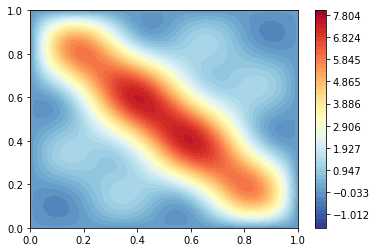

In [21]:
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)
data= tf.cast(d,tf.float32)

#y_new=model(data)
y_new=output_plot_data
fig = plt.figure()       
Z=tf.reshape((y_new),np.shape(X))
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-1.6, 8.0, 50)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=8.0, vmin=-1.6)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)

plt.savefig('true_solution_PRNN.pdf')

KMeans(n_clusters=3)

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [185]:

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_train, labels, metric = 'euclidean'))

In [186]:
sil

[0.60502297,
 0.81248796,
 0.65546817,
 0.50269943,
 0.33632195,
 0.33983937,
 0.33131167,
 0.33136982,
 0.33207828,
 0.3273863,
 0.32404068,
 0.3210428,
 0.32059023,
 0.32363302,
 0.32427427,
 0.31870106,
 0.32289335,
 0.32759953,
 0.3271416]

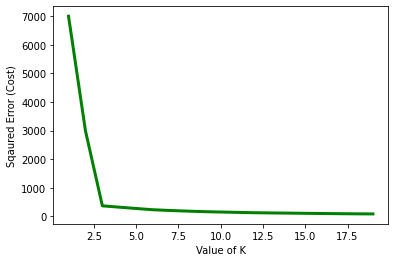

In [187]:
cost =[]
for i in range(1, 20):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data_train)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 20), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot

In [8]:
gauss_weights = loadmat('gauss_weights.mat')
gauss_weights=np.array(list(gauss_weights.values()))[-1].squeeze(-1)

In [10]:
gauss_weights

array([0.0233336 , 0.02278668, 0.02170566, 0.02011589, 0.01805462,
       0.01557017, 0.0127208 , 0.00957337, 0.00620201, 0.0026906 ,
       0.0233336 , 0.02278668, 0.02170566, 0.02011589, 0.01805462,
       0.01557017, 0.0127208 , 0.00957337, 0.00620201, 0.0026906 ,
       0.02278668, 0.02225258, 0.0211969 , 0.01964439, 0.01763143,
       0.01520522, 0.01242264, 0.00934898, 0.00605664, 0.00262753,
       0.02278668, 0.02225258, 0.0211969 , 0.01964439, 0.01763143,
       0.01520522, 0.01242264, 0.00934898, 0.00605664, 0.00262753,
       0.02170566, 0.0211969 , 0.0201913 , 0.01871244, 0.01679498,
       0.01448387, 0.0118333 , 0.00890545, 0.00576931, 0.00250288,
       0.02170566, 0.0211969 , 0.0201913 , 0.01871244, 0.01679498,
       0.01448387, 0.0118333 , 0.00890545, 0.00576931, 0.00250288,
       0.02011589, 0.01964439, 0.01871244, 0.0173419 , 0.01556488,
       0.01342304, 0.0109666 , 0.0082532 , 0.00534675, 0.00231956,
       0.02011589, 0.01964439, 0.01871244, 0.0173419 , 0.01556